In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import shutil
shutil.copy("/content/drive/MyDrive/AI_Datasets/BW_DB.zip", "/content")

'/content/BW_DB.zip'

In [3]:
%cd /content

/content


In [4]:
import os

In [5]:
import zipfile
for file in os.listdir():
    if file.endswith(".zip"):
        with zipfile.ZipFile(file, "r") as zip_file:
            zip_file.extractall()
        os.remove(file)

In [6]:
import os
import torch
import torchvision
import tarfile
import torch.nn as nn
import numpy as np
import torch.nn.functional as F
from torchvision.datasets.utils import download_url
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
from torch.utils.data import random_split
from torchvision.utils import make_grid
import matplotlib
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
from torch.utils.data.sampler import SubsetRandomSampler
import glob
import torch.optim as optim
import time
import cv2
import torch
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import torch.utils.data as td
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
from matplotlib import image
from matplotlib import pyplot
import time
import torchvision.datasets as datasets
from tqdm import tqdm
from torch.utils.tensorboard import SummaryWriter
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd
%matplotlib inline

In [7]:
data_dir = '/content/BW_DB/'
IMAGE_DIM=256
writer = SummaryWriter()
print(os.listdir(data_dir+'train'))

['fear', 'sad', 'happy', 'angry', 'surprise', 'neutral']


In [8]:
train_dataset = None
test_dataset = None
def load_data(train_path, test_path, batch_size, input_size):
    global train_dataset
    global test_dataset
    ######## Write your code here ########
    
    transform_dict = {
                    'src': transforms.Compose([
                      transforms.Grayscale(3),
                      transforms.Resize(input_size),
                      transforms.RandomHorizontalFlip(), 
                      transforms.ToTensor(),
                      transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                            std=[0.229, 0.224, 0.225]),
     ])}

    train_data = datasets.ImageFolder(root=train_path, transform=transform_dict['src'])
    test_data = datasets.ImageFolder(root=test_path, transform=transform_dict['src'])
    
    data_loader_train = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True, drop_last=False, num_workers=0)
    data_loader_test  = torch.utils.data.DataLoader(test_data, batch_size=batch_size, shuffle=True, drop_last=False, num_workers=0)
    
    return data_loader_train, data_loader_test

(48, 48)
(48, 48)
(48, 48)


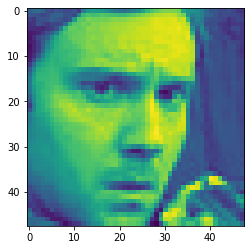

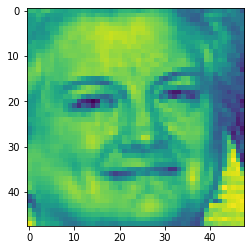

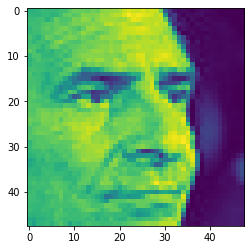

In [9]:
train_path = "/content/BW_DB/train/"
test_path = "/content/BW_DB/test/"

######## Write your code here ########
InterestedImage = image.imread(train_path+"/angry/0.jpg")
plt.figure()
plt.imshow(InterestedImage)
DisaapointedImage = image.imread(train_path+"/happy/100.jpg")
plt.figure()
plt.imshow(DisaapointedImage)
NeutralImage = image.imread(train_path+"/sad/10006.jpg")
plt.figure()
plt.imshow(NeutralImage)
print(NeutralImage.shape)
print(DisaapointedImage.shape)
print(NeutralImage.shape)

In [10]:
train_loader, test_loader = load_data(train_path, test_path, 32, (128, 128))
print(len(train_loader), len(test_loader))

282 44


In [11]:
def plot_data_loader(data_loader, gridDims):
    
    fig, axes = plt.subplots(nrows=gridDims[0], ncols=gridDims[1], figsize=(5,5))
    dataiter = iter(data_loader)
    for i in range(gridDims[0]):
        for j in range(gridDims[1]):
            images, _ = dataiter.next()
            axes[i, j].imshow(np.transpose(images[0].numpy(), (1, 2, 0)))
            print(images.shape)

torch.Size([32, 3, 128, 128])


torch.Size([32, 3, 128, 128])
torch.Size([32, 3, 128, 128])
torch.Size([32, 3, 128, 128])


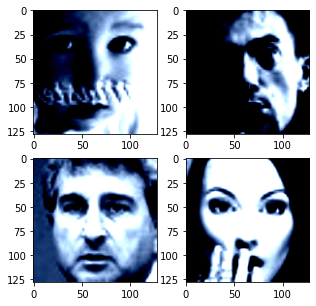

In [12]:
plot_data_loader(train_loader, (2, 2))

In [13]:
model = torch.hub.load('pytorch/vision:v0.10.0', 'mobilenet_v2', weights=None)
n_classes = 6

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("Device: {}".format(device))
model.to(device)

Downloading: "https://github.com/pytorch/vision/zipball/v0.10.0" to /root/.cache/torch/hub/v0.10.0.zip


Device: cuda:0


MobileNetV2(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU6(inplace=True)
    )
    (1): InvertedResidual(
      (conv): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
          (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU6(inplace=True)
        )
        (1): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (2): InvertedResidual(
      (conv): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(16, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): BatchNorm2d(96, eps=

In [14]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("Device: {}".format(device))
model.to(device);

Device: cuda:0


In [15]:
for i, data in enumerate(train_loader):
        images, labels = data[0].to(device), data[1].to(device)
        print(images.shape)
        #print(labels)
        if i == 5:
          break

torch.Size([32, 3, 128, 128])
torch.Size([32, 3, 128, 128])
torch.Size([32, 3, 128, 128])
torch.Size([32, 3, 128, 128])
torch.Size([32, 3, 128, 128])
torch.Size([32, 3, 128, 128])


In [16]:
def evaluate(model, test_loader):
  model.eval() 
  with torch.no_grad(): 
    correct = 0
    total = 0
    for data in test_loader:
      images, labels = data[0].to(device), data[1].to(device)
      labels=torch.flatten(labels)
      outputs = model(images)
      loss = criterion(outputs, labels)
      _, predicted = torch.max(outputs.data, 1)
      total += labels.size(0)
      correct += (predicted == labels).sum().item()
  accuracy = (correct / total) * 100
  model.train()
  return accuracy, loss.item()

In [17]:
def train(num_epochs, model, train_loader, criterion, optimizer):
    total_steps = len(train_loader)
    t1 = time.time()

    training_loss = []
    training_accuracy = []
    validation_loss = []
    validation_accuracy = []

    loss = None

    for epoch in range(num_epochs):
        for i, data in enumerate(train_loader):
            images, labels = data[0].to(device), data[1].to(device)
            # Forward pass
            outputs = model(images)
            loss = criterion(outputs, labels)
            # Backprop and optimisation
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            # Train accuracy
            total = labels.size(0)
            _,predicted = torch.max(outputs.data, 1)
            correct = (predicted == labels).sum().item()
            if (i + 1) % 100 == 0:
                val_accu, val_loss = evaluate(model, test_loader)
                print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}, Accuracy: {:.2f}, val_loss: {:.4f}, val_accuracy: {:.2f}%'.format(epoch + 1, num_epochs, i + 1, total_steps, loss.item(),(correct / total) * 100, val_loss, val_accu))
                training_loss.append(loss.item())
                training_accuracy.append((correct / total) * 100)
                validation_accuracy.append(val_accu)
                validation_loss.append(val_loss)
                
    print("######## Training Finished in {} seconds ###########".format(time.time()-t1))
    return training_loss, training_accuracy, model

In [18]:
def confusion_matrix_for_specific_LR(lr, model):
    y_pred = []
    y_true = []
    for i, data in enumerate(test_loader):
        
        inputs, labels = data[0].to(device), data[1].to(device)
        output = model(inputs) # Feed Network
        
        output = (torch.max(torch.exp(output), 1)[1]).data.cpu().numpy()
        y_pred.extend(output) # Save Prediction
        labels = labels.data.cpu().numpy()
        y_true.extend(labels) # Save Truth

    # constant for classes
    classes = ('fear', 'sad', 'happy', 'angry', 'surprise', 'neutral')

    # Build confusion matrix
    cf_matrix = confusion_matrix(y_true, y_pred)

    import seaborn as sns

    # sns.heatmap(cf_matrix, annot=True)
    df_cm = pd.DataFrame(cf_matrix, index = [i for i in classes],
                         columns = [i for i in classes])
    plt.figure(figsize = (12,7))
    sn.heatmap(df_cm, annot=True)
    plt.title(f'Confusion matrix for lr {lr}')
    plt.savefig(f'Confusion_matrix_mobilenet_BW_lr_{lr}.png')

Results of the learning rate = 0.01


Using cache found in /root/.cache/torch/hub/pytorch_vision_v0.10.0


Epoch [1/50], Step [100/282], Loss: 1.9003, Accuracy: 21.88, val_loss: 2.9994, val_accuracy: 14.45%
Epoch [1/50], Step [200/282], Loss: 1.6579, Accuracy: 34.38, val_loss: 1.8968, val_accuracy: 25.59%
Epoch [2/50], Step [100/282], Loss: 1.9155, Accuracy: 12.50, val_loss: 1.6980, val_accuracy: 23.87%
Epoch [2/50], Step [200/282], Loss: 1.7520, Accuracy: 21.88, val_loss: 1.9269, val_accuracy: 21.57%
Epoch [3/50], Step [100/282], Loss: 1.6579, Accuracy: 40.62, val_loss: 2.2994, val_accuracy: 32.35%
Epoch [3/50], Step [200/282], Loss: 2.0427, Accuracy: 28.12, val_loss: 1.7865, val_accuracy: 36.09%
Epoch [4/50], Step [100/282], Loss: 1.4181, Accuracy: 37.50, val_loss: 1.6212, val_accuracy: 34.65%
Epoch [4/50], Step [200/282], Loss: 1.2989, Accuracy: 40.62, val_loss: 1.3173, val_accuracy: 38.32%
Epoch [5/50], Step [100/282], Loss: 2.1665, Accuracy: 21.88, val_loss: 1.6929, val_accuracy: 38.10%
Epoch [5/50], Step [200/282], Loss: 1.5310, Accuracy: 46.88, val_loss: 1.1227, val_accuracy: 36.45%


Using cache found in /root/.cache/torch/hub/pytorch_vision_v0.10.0


Epoch [1/50], Step [100/282], Loss: 1.8074, Accuracy: 18.75, val_loss: 1.8973, val_accuracy: 16.53%
Epoch [1/50], Step [200/282], Loss: 1.7804, Accuracy: 9.38, val_loss: 1.6586, val_accuracy: 24.87%
Epoch [2/50], Step [100/282], Loss: 1.7175, Accuracy: 34.38, val_loss: 1.7944, val_accuracy: 20.20%
Epoch [2/50], Step [200/282], Loss: 1.8166, Accuracy: 12.50, val_loss: 1.7139, val_accuracy: 23.44%
Epoch [3/50], Step [100/282], Loss: 1.7882, Accuracy: 21.88, val_loss: 1.6824, val_accuracy: 21.42%
Epoch [3/50], Step [200/282], Loss: 1.7205, Accuracy: 28.12, val_loss: 1.7809, val_accuracy: 21.71%
Epoch [4/50], Step [100/282], Loss: 1.7506, Accuracy: 28.12, val_loss: 1.7496, val_accuracy: 25.66%
Epoch [4/50], Step [200/282], Loss: 1.7027, Accuracy: 31.25, val_loss: 1.9437, val_accuracy: 26.53%
Epoch [5/50], Step [100/282], Loss: 1.8604, Accuracy: 31.25, val_loss: 1.8226, val_accuracy: 27.17%
Epoch [5/50], Step [200/282], Loss: 1.7315, Accuracy: 21.88, val_loss: 1.6926, val_accuracy: 29.62%
E

Using cache found in /root/.cache/torch/hub/pytorch_vision_v0.10.0


Epoch [1/50], Step [100/282], Loss: 4.0972, Accuracy: 25.00, val_loss: 4.4622, val_accuracy: 12.65%
Epoch [1/50], Step [200/282], Loss: 2.4516, Accuracy: 15.62, val_loss: 2.3539, val_accuracy: 15.96%
Epoch [2/50], Step [100/282], Loss: 2.0002, Accuracy: 9.38, val_loss: 1.9371, val_accuracy: 16.97%
Epoch [2/50], Step [200/282], Loss: 1.9052, Accuracy: 21.88, val_loss: 1.8972, val_accuracy: 16.75%
Epoch [3/50], Step [100/282], Loss: 1.8502, Accuracy: 12.50, val_loss: 1.8486, val_accuracy: 18.04%
Epoch [3/50], Step [200/282], Loss: 1.8708, Accuracy: 15.62, val_loss: 1.8504, val_accuracy: 17.54%
Epoch [4/50], Step [100/282], Loss: 1.8448, Accuracy: 6.25, val_loss: 1.8168, val_accuracy: 18.76%
Epoch [4/50], Step [200/282], Loss: 1.8109, Accuracy: 21.88, val_loss: 1.8317, val_accuracy: 16.32%
Epoch [5/50], Step [100/282], Loss: 1.8241, Accuracy: 12.50, val_loss: 1.8142, val_accuracy: 18.40%
Epoch [5/50], Step [200/282], Loss: 1.7990, Accuracy: 6.25, val_loss: 1.8055, val_accuracy: 19.19%
Epo

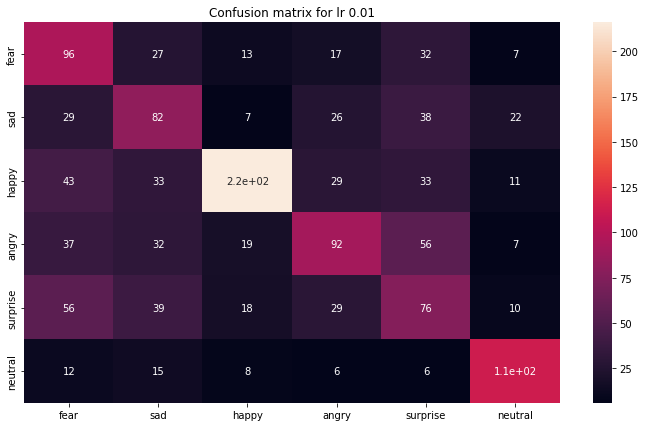

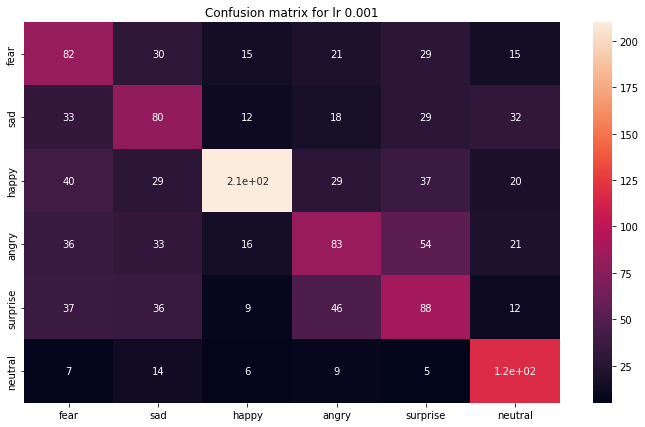

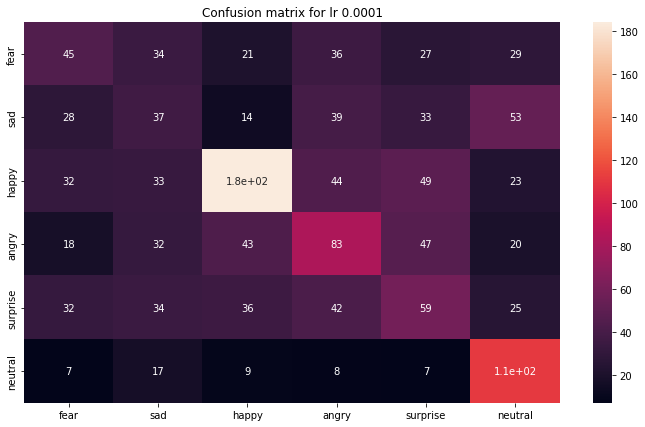

In [19]:
############ Define the dictionaries and set the values for number of epochs and batch size ############
hyper_parameters = {'learning_rate': [0.01, 0.001, 0.0001]}
train_loss_hyper_paramaters = {'lr0.01':0, 'lr0.001': 0, 'lr0.0001' : 0}
train_acc_hyper_paramaters = {'lr0.01':0, 'lr0.001': 0, 'lr0.0001' : 0}

for learning_rate in hyper_parameters["learning_rate"]:
    print(f'Results of the learning rate = {learning_rate}')
    model = torch.hub.load('pytorch/vision:v0.10.0', 'mobilenet_v2', weights = None)
    criterion = nn.CrossEntropyLoss()
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    model.to(device)
    optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)
    train_loader, test_loader = load_data(train_path, test_path, 32, (128, 128))
    
    ############ Call the train function ###########
    num_epochs = 50
    training_loss, training_accuracy, model = train(num_epochs, model, train_loader, criterion, optimizer)
    confusion_matrix_for_specific_LR(learning_rate, model)

    # model = model_defination()

    ############ Store train_loss, and train_accuracy in the defined dictionaries ###########
    train_loss_hyper_paramaters[f'lr{learning_rate}'] = training_loss
    train_acc_hyper_paramaters[f'lr{learning_rate}'] = training_accuracy

In [22]:
PATH = "/content/drive/MyDrive/AI/Models/mobileNet_BW.pt"
torch.save(model.state_dict(), PATH)

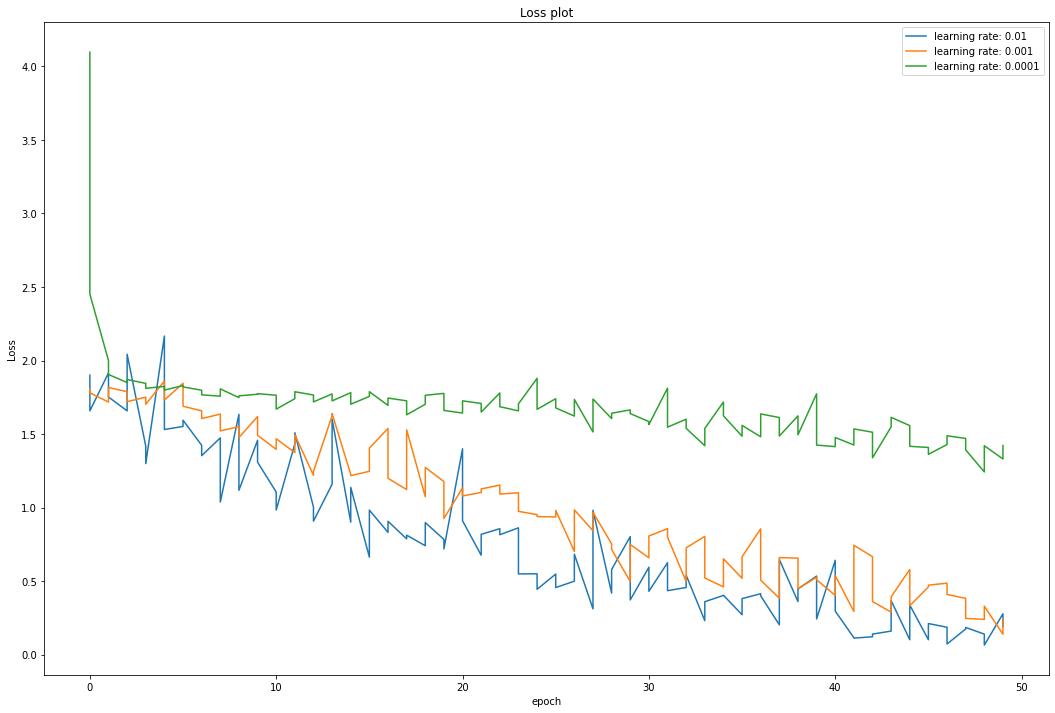

In [23]:
####### plotting train loss versus epoch for each learning rate in one plot #########

epochs = [i//2 for i in range(num_epochs*2)]
plt.figure(figsize=(18,12))
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.title('Loss plot')

for learning_rate in hyper_parameters["learning_rate"]:
    plt.plot(epochs,train_loss_hyper_paramaters[f'lr{learning_rate}'],label=f'learning rate: {learning_rate}')
    
plt.legend()
plt.savefig('Loss_mobilenet_BW.png')

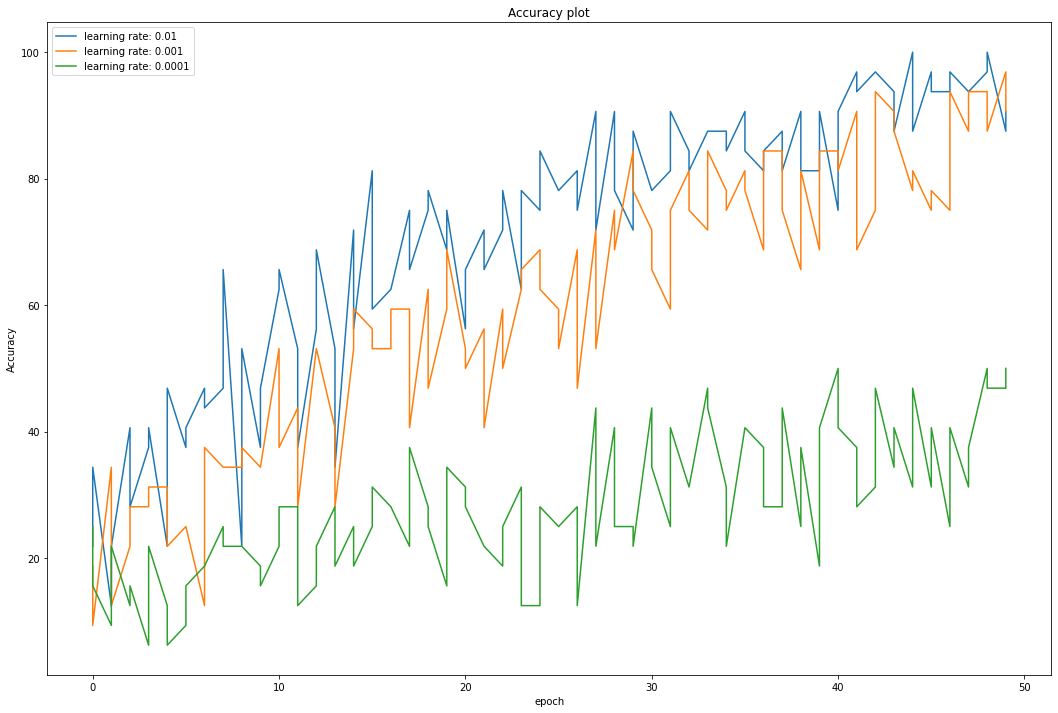

In [24]:
####### plotting train accuracy versus epoch for each learning rate in one plot #########

epochs = [i//2 for i in range(num_epochs*2)]
plt.figure(figsize=(18,12))
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy plot')

for learning_rate in hyper_parameters["learning_rate"]:
    plt.plot(epochs,train_acc_hyper_paramaters[f'lr{learning_rate}'],label=f'learning rate: {learning_rate}')
    
plt.legend()
plt.savefig('Accuracy_mobilenet_BW.png')